<a href="https://colab.research.google.com/github/uervitonsantos/visao_computacional_tratamento_de_imagens/blob/main/visao_computacional_tratamento_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Exibição na mesma tela do Jupyter
%matplotlib inline

plt.style.use("seaborn")
sns.set_style("whitegrid", {"axes.grid" : False})

In [2]:
imagem = cv2.imread("/content/drive/MyDrive/imagens/passaro.jpg", cv2.IMREAD_COLOR)
print("comprimento (w): %d pixels" % (imagem.shape[1]))
print("altura (h): %d pixels" % (imagem.shape[0]))
print("canais: %d" % (imagem.shape[2]))

comprimento (w): 900 pixels
altura (h): 450 pixels
canais: 3


In [3]:
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

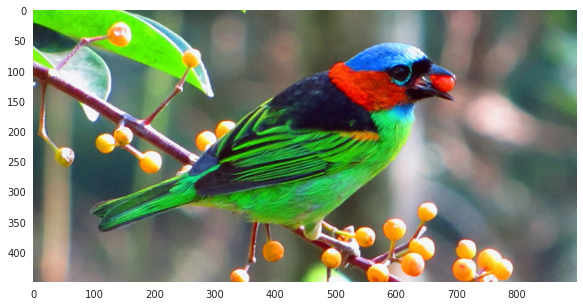

In [4]:
plt.figure(figsize=(10,5))
plt.imshow(imagem)

In [5]:
(r, g, b) = imagem[0, 0]
print("Pixel at (0, 0) - Red: %d, Green: %d, Blue: %d" % (r, g, b))

Pixel at (0, 0) - Red: 85, Green: 227, Blue: 1


In [6]:
imagem[0:50, 0:50] = (0, 0, 255)
(r, g, b) = imagem[0, 0]
print("Pixel at (0, 0) - Red: %d, Green: %d, Blue: %d" % (r, g, b))

Pixel at (0, 0) - Red: 0, Green: 0, Blue: 255


In [17]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

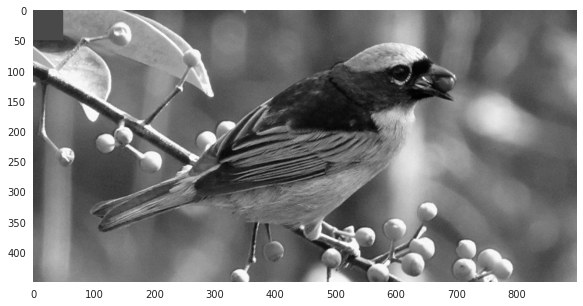

In [18]:
plt.figure(figsize=(10,5))
plt.imshow(imagem_gray, cmap = "gray")

In [10]:
g = imagem_gray[0, 0]
print("Pixel at (0, 0) - Grayscale: %d" % (g))

Pixel at (0, 0) - Grayscale: 76


In [11]:
imagem_gray.shape

(450, 900)

In [12]:
imagem.shape

(450, 900, 3)

In [13]:
r, g, b = cv2.split(imagem)

Text(0.5, 1.0, 'Pássaro Blue')

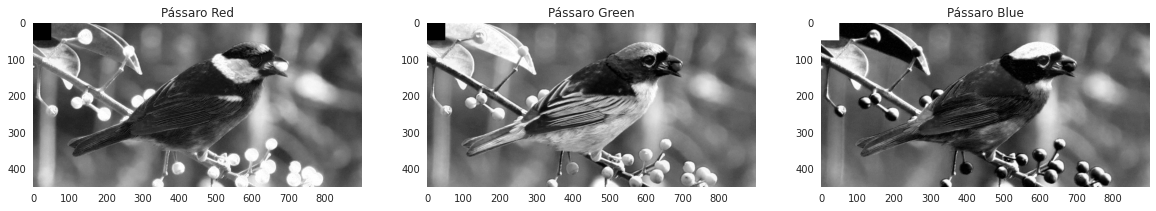

In [19]:
plt.figure(figsize=(20,20))

#Composição Vermelha
plt.subplot(1,3,1)
plt.imshow(r, cmap = "gray")
plt.title("Pássaro Red")

#Composição Verde
plt.subplot(1,3,2)
plt.imshow(g, cmap = "gray")
plt.title("Pássaro Green")

#Composição Azul
plt.subplot(1,3,3)
plt.imshow(b, cmap = "gray")
plt.title("Pássaro Blue")

In [15]:
r, g, b = cv2.split(imagem)
imagem_vazia = np.zeros(imagem.shape[:2], dtype=np.uint8)

###Utilizando a função merge para combinar as componentes de cores e trazer sua visualização original.

Text(0.5, 1.0, 'Pássaro Blue')

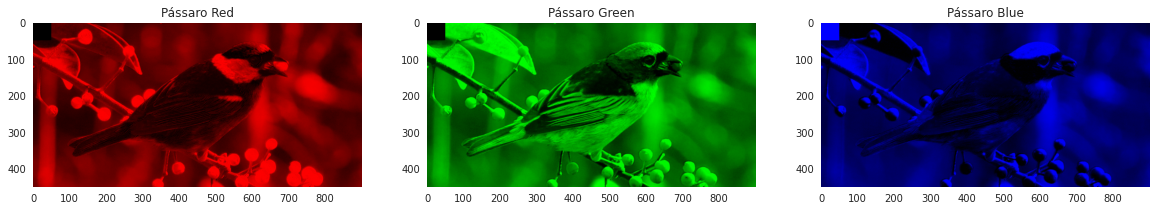

In [20]:
plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.imshow(cv2.merge([r, imagem_vazia, imagem_vazia]))
plt.title("Pássaro Red")

plt.subplot(1,3,2)
plt.imshow(cv2.merge([imagem_vazia, g, imagem_vazia]))
plt.title("Pássaro Green")

plt.subplot(1,3,3)
plt.imshow(cv2.merge([imagem_vazia, imagem_vazia, b]))
plt.title("Pássaro Blue")

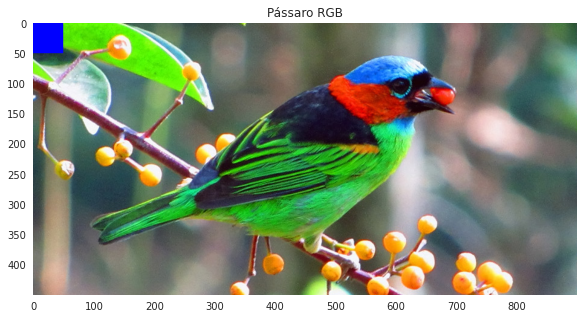

In [21]:
imagem_merged = cv2.merge([r, g, b])

plt.figure(figsize=(10,5))
plt.title("Pássaro RGB")
plt.imshow(imagem_merged)

In [22]:
r, g, b = cv2.split(imagem)

Uma vez que é possível separar cada componente de imagem, também podemos interagir com estes valores para aumentar a intensidade de cada componente. Note que isso pode resultar em saturações, que é quando um determinado pixel atinge seu valor máximo.


Text(0.5, 1.0, 'Intensificado Vermelho')

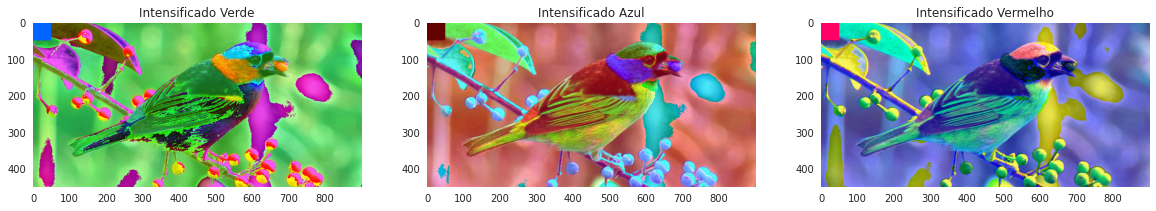

In [23]:
plt.figure(figsize=(20,20))

#Intensificando o componente verde da imagem
plt.subplot(1,3,1)
plt.imshow(cv2.merge([r, g+100, b]))
plt.title("Intensificado Verde")

#Intensificando o componente azul da imagem
plt.subplot(1,3,2)
plt.imshow(cv2.merge([b+100, g, r]))
plt.title("Intensificado Azul")

#Intensificando o componente vermelho da imagem
plt.subplot(1,3,3)
plt.imshow(cv2.merge([b, g, r+100]))
plt.title("Intensificado Vermelho")

Manipulando imagem no espaço HSV

In [24]:
imagem_hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

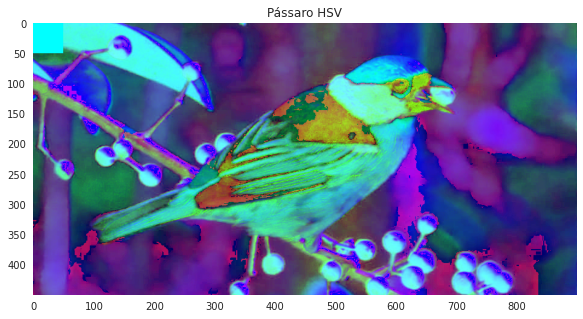

In [28]:
plt.figure(figsize=(10,5))
plt.title("Pássaro HSV")
plt.imshow(imagem_hsv)

Text(0.5, 1.0, 'Pássaro Hue (Matiz)')

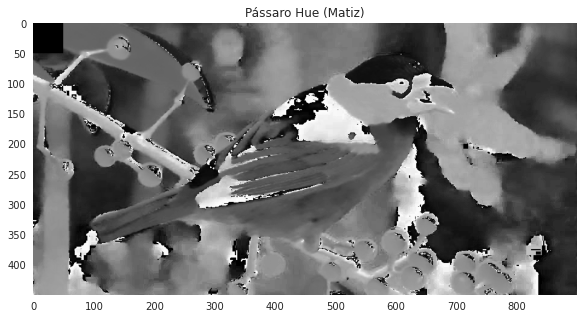

In [29]:
plt.figure(figsize=(10,5))
plt.imshow(imagem_hsv[:,:,0], cmap="gray")
plt.title("Pássaro Hue (Matiz)")

Text(0.5, 1.0, 'Pássaro Saturation (Saturação)')

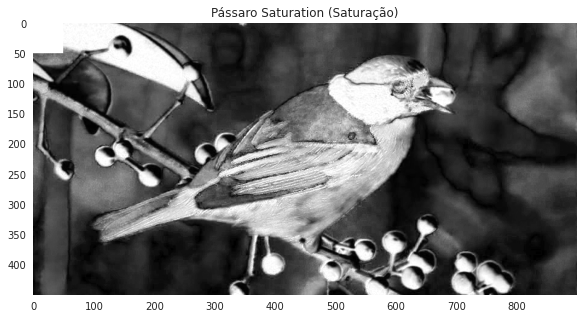

In [34]:
plt.figure(figsize=(10,5))
plt.imshow(imagem_hsv[:,:,1], cmap="gray")
plt.title("Pássaro Saturation (Saturação)")

Text(0.5, 1.0, 'Pássaro Value (Brilho)')

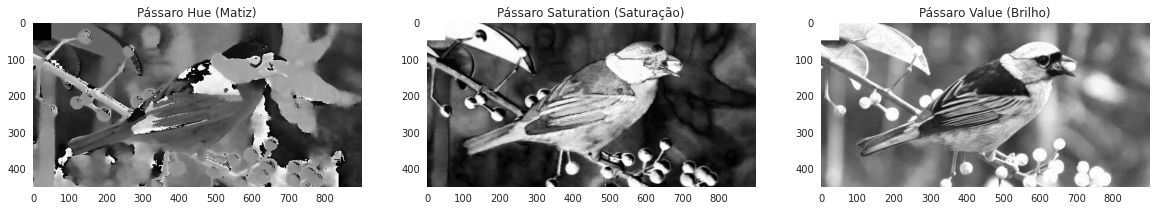

In [37]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.imshow(imagem_hsv[:,:,0], cmap="gray")
plt.title("Pássaro Hue (Matiz)")

plt.subplot(1,3,2)
plt.imshow(imagem_hsv[:,:,1], cmap="gray")
plt.title("Pássaro Saturation (Saturação)")

plt.subplot(1,3,3)
plt.imshow(imagem_hsv[:,:,2], cmap="gray")
plt.title("Pássaro Value (Brilho)")

Manipulando imagem no espaço RGB

A função split separa de uma imagem RGB (ou BGR) suas componetnes R, G e B.

Definindo um dicionário dos componentes de cores para ser utilizado nas funções de histograma.

In [38]:
cores = {"r": 0, "g": 1, "b": 2}

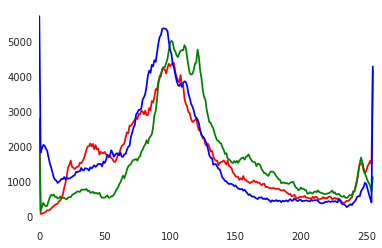

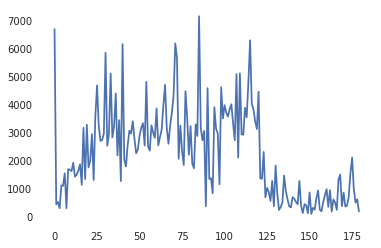

In [39]:
def histograma_bgr(imagem):
    for cor in cores:
        histograma = cv2.calcHist([imagem],[cores[cor]],None,[256],[0,256])
        plt.plot(histograma,color = cor)
        plt.xlim([0,256])
    plt.show()

def histograma_hue(imagem_hsv):
    imagem_hsv = cv2.cvtColor(imagem_hsv, cv2.COLOR_BGR2HSV)
    histograma_hue = cv2.calcHist([imagem_hsv], [0], None, [180], [0, 180])
    plt.plot(histograma_hue)
    plt.show() 

histograma_bgr(imagem)
histograma_hue(imagem)